# FRONTRUNNER RIDERSHIP AND WEATHER

By: Matt J.

## Background Information
The question that I wanted to answer is, "Does weather affect how many riders FrontRunner get?". I decided to do answer this question because at the time of this project, I work for FrontRunner as a Train Host and I feel like that the weather could affect ridership to an extent. I feel like that winter might get more riders then in the summer then the winter since people don't want to stand out on a platform waiting for a train. I used NOAA for the dataset on weather in Salt Lake City and UTA's ridership data to get the boardings.

## Setting up the data
Below, I am getting the data ready for me to use

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
stationStuff = pd.read_csv("./data/UTA_Station_Boardings_-_Rail.csv")
stationDict = {}
weatherStuff = pd.read_csv("./data/3140270.csv")
weatherDict = {}

# Data Cleaning
Below I am cleaning up my data so I can actually start to play around with it

In [8]:
i = 0
for index, row in stationStuff.iterrows():
    if row['LineAbbr'] == 750 and row['Year'] == 2019:
        stationDict[i] = row
        i+=1
print("Sample data from UTA_Station_Boardings_-_Rail.csv\n", stationDict[0],"\n")

i = 0
for index, row in weatherStuff.iterrows():
    if "SALT LAKE CITY INTERNATIONAL AIRPORT" in row["NAME"]:
        weatherDict[i] = row
        i+=1
print("Sample data from 3140270.csv\n", weatherDict[0])


Sample data from UTA_Station_Boardings_-_Rail.csv
 Mode                     Commuter Rail
LineAbbr                           750
Route                      FrontRunner
Month                          January
Year                              2019
ServiceType                        SAT
StopName         American Fork Station
StopAbbrOne                   FR801160
StopAbbrTwo                   FR801160
AvgBoardings                       226
AvgAlightings                      231
ObjectId                           559
Name: 558, dtype: object 

Sample data from 3140270.csv
 STATION                                    USW00024127
NAME       SALT LAKE CITY INTERNATIONAL AIRPORT, UT US
DATE                                        2019-01-01
PRCP                                               0.0
SNOW                                               0.0
SNWD                                               2.0
TAVG                                              17.0
TMAX                                   

Now that I have the basic dicts set up, I need to sort the data out more and more.

In [9]:
monthsOfYear = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
weatherByMonth = {}
ridershipByStation = {}
ridershipByMonthAndStation = {}

for month in monthsOfYear:
    weatherByMonth[month] = []
    ridershipByMonthAndStation[month] = {}

for key in stationDict:
    if stationDict[key]['StopName'] not in list(ridershipByStation.keys()):
        ridershipByStation[stationDict[key]['StopName']] = [0, 0]
    for month in ridershipByMonthAndStation:
        if stationDict[key]['StopName'] not in list(ridershipByMonthAndStation[month].keys()):
            ridershipByMonthAndStation[month][stationDict[key]['StopName']] = [0,0]
        
for event in stationDict:
    ridershipByStation[stationDict[event]['StopName']][0] += stationDict[event]['AvgBoardings']
    ridershipByStation[stationDict[event]['StopName']][1] += stationDict[event]['AvgAlightings'] 

for event in stationDict:
    for month in ridershipByMonthAndStation:
        if stationDict[event]['Month'] == month:
            ridershipByMonthAndStation[month][stationDict[event]['StopName']][0] += stationDict[event]['AvgBoardings']
            ridershipByMonthAndStation[month][stationDict[event]['StopName']][1] += stationDict[event]['AvgAlightings']
    
    
for key in weatherDict:
    month = weatherDict[key]['DATE'][5:7]
    if month[0] == '0':
        month = month[1:2]
    month = int(month)
    weatherByMonth[monthsOfYear[month-1]].append(weatherDict[key]['TAVG'])
weatherByMonthKept = weatherByMonth.copy()

for event in weatherByMonth:
    weatherByMonth[event] = round(sum(weatherByMonth[event])/len(weatherByMonth[event]), 2)

Now we have places our data into some dicts and lists that'll we use for charts.

I did it this way to make it easier for when I actaully plot the items to their charts. I 
# Data analysis

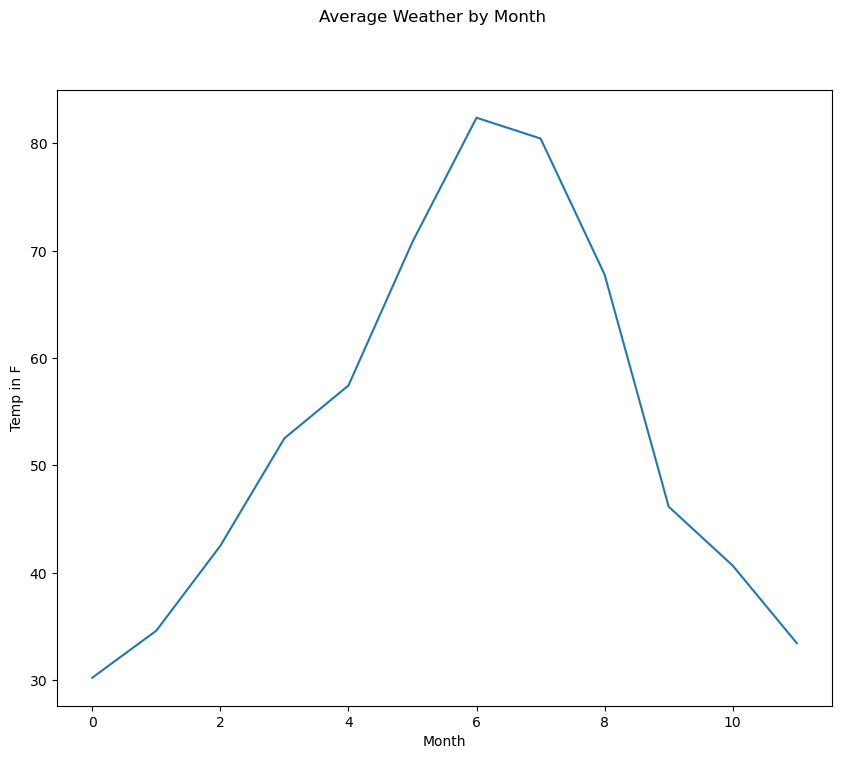

In [10]:
fig = plt.figure(figsize=(10,8))
plotWeather = fig.add_subplot(1,1,1)
fig.suptitle("Average Weather by Month")
plotWeather.set_xlabel("Month")
plotWeather.set_ylabel("Temp in F")
plt.plot(weatherByMonth.values())

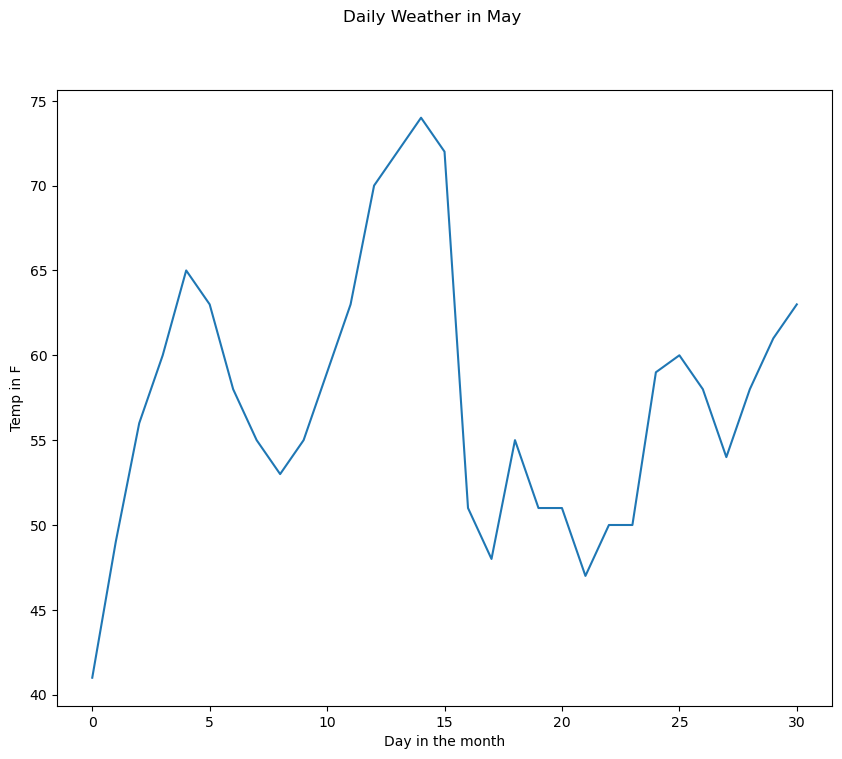

In [14]:
fig = plt.figure(figsize=(10,8))
plotWeatherDaily = fig.add_subplot(1,1,1)
fig.suptitle("Daily Weather in May")
plotWeatherDaily.set_xlabel("Day in the month")
plotWeatherDaily.set_ylabel("Temp in F")

plt.plot(weatherByMonthKept['May'])

plt.show()

<BarContainer object of 15 artists>

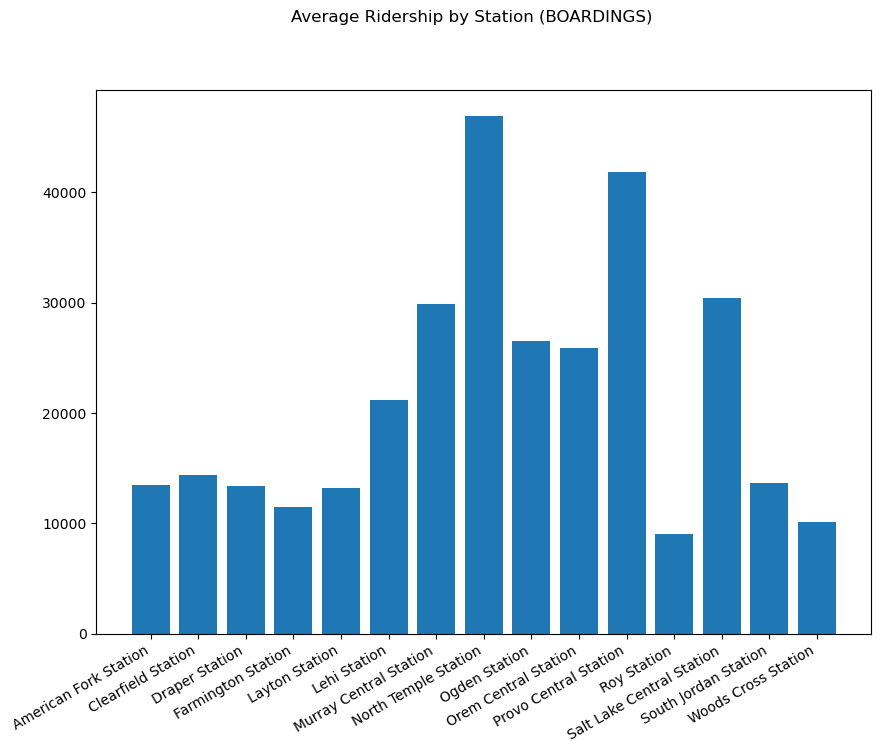

In [12]:
names = list(ridershipByStation.keys())
data = []
for item in ridershipByStation:
    data.append(ridershipByStation[item][0])

fig = plt.figure(figsize=(10,8))
plotRidership = fig.add_subplot(1,1,1)
fig.suptitle("Average Ridership by Station (BOARDINGS)")
fig.autofmt_xdate()
plt.bar(range(len(data)), data, tick_label = names)

<BarContainer object of 15 artists>

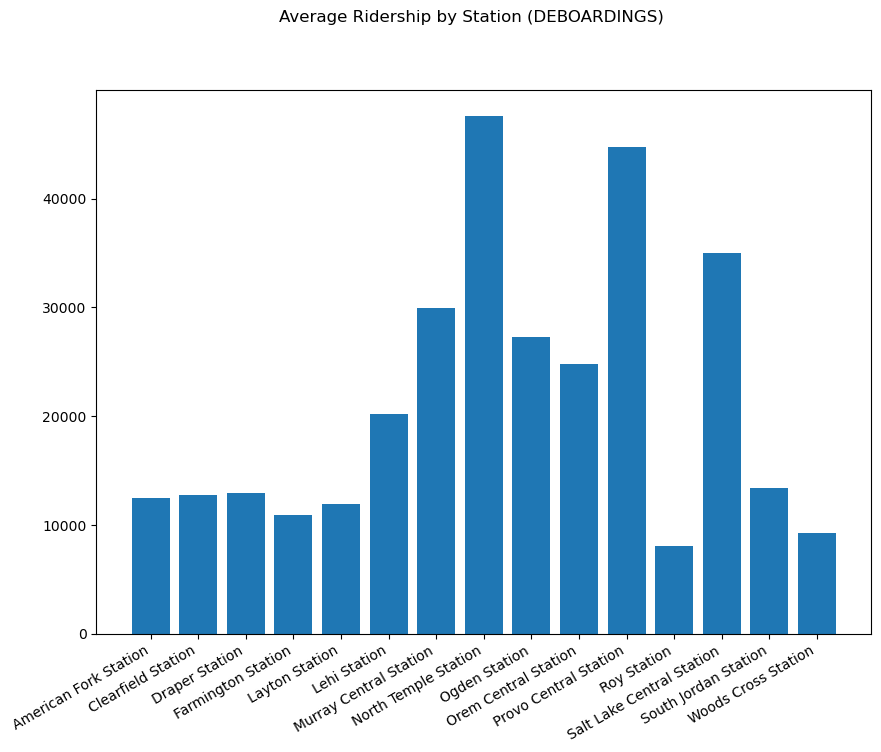

In [6]:
names = list(ridershipByStation.keys())
data = []
for item in ridershipByStation:
    data.append(ridershipByStation[item][1])

fig = plt.figure(figsize=(10,8))
plotRidership = fig.add_subplot(1,1,1)
fig.suptitle("Average Ridership by Station (DEBOARDINGS)")
fig.autofmt_xdate()
plt.bar(range(len(data)), data, tick_label = names)

In [7]:
ridershipByMonthAndStation
boardings = []
deboardings = []
i = 0
for month in ridershipByMonthAndStation:
    boardings.append(0)
    deboardings.append(0)
    for station in ridershipByMonthAndStation[month]:
        boardings[i] += ridershipByMonthAndStation[month][station][0]
        deboardings[i] += ridershipByMonthAndStation[month][station][1]
    i += 1

<BarContainer object of 12 artists>

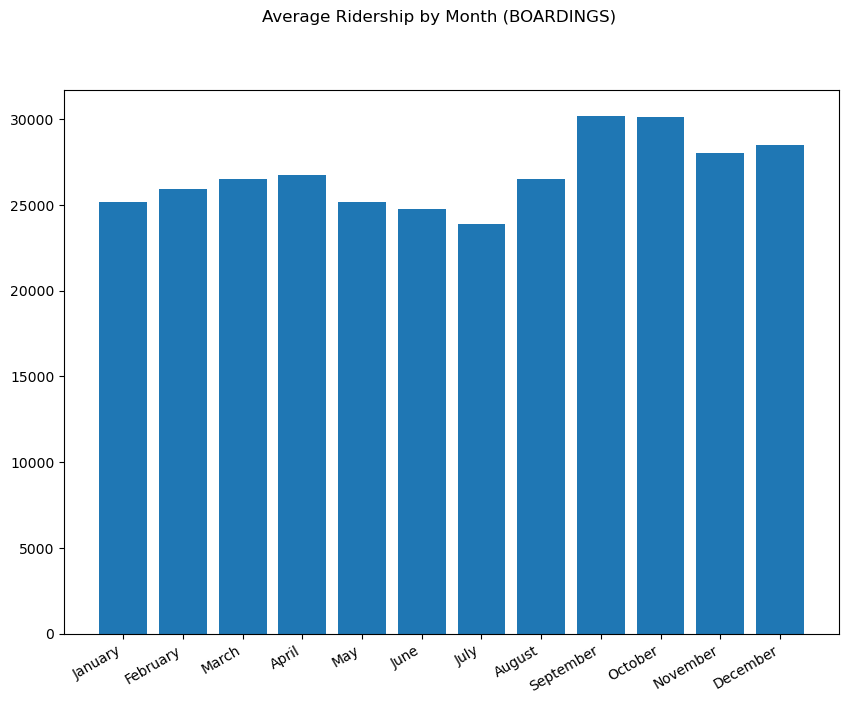

In [8]:
fig = plt.figure(figsize=(10,8))
plotRidership = fig.add_subplot(1,1,1)
fig.suptitle("Average Ridership by Month (BOARDINGS)")
fig.autofmt_xdate()
plt.bar(range(len(boardings)), boardings, tick_label = monthsOfYear)

The Deboarding chart is the exact same, give or take 100 people due to the sensors not being the best

[30.23, 34.61, 42.52, 52.53, 57.45, 70.83, 82.39, 80.45, 67.77, 46.16, 40.67, 33.45]
[25175, 25943, 26529, 26750, 25149, 24746, 23868, 26529, 30197, 30117, 28028, 28466]


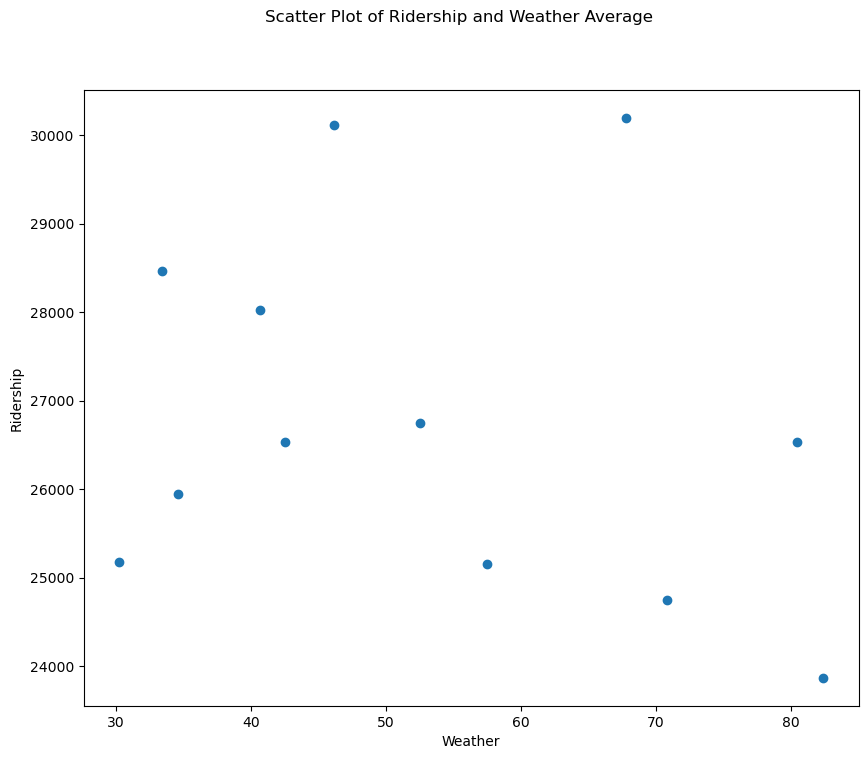

In [9]:
fig = plt.figure(figsize=(10,8))
plotWeather = fig.add_subplot(1,1,1)
fig.suptitle("Scatter Plot of Ridership and Weather Average")
plotWeather.set_xlabel("Weather")
plotWeather.set_ylabel("Ridership")
plt.scatter(weatherByMonth.values(), boardings)

Just from looking at this chart, we can see that there is little to no correlation. The lists have been sorted by month already, so they are realted that way

In [10]:
np.corrcoef(list(weatherByMonth.values()), boardings)[0, 1]

-0.2472413915820272

As we can see above, we have a correlation of -0.2, which shows us that the very little inversely realated. This means that the two data sets are a little bit inversly related. As the weather gets colder, the ridership goes up. And as weather get warmer, the ridership goes down a little bit